
Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [1]:
import pandas as pd                          #Importing necessary Libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Both Training Data and the Data to be Tested.
df_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
df_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [5]:
#Observations:
# Subscribed Column,which is output is not present in Test Dataset

In [6]:
# we will start with Data Analysis in Training Data and Testing Data.

# TrainData(shape)
df_train.shape

(31647, 18)

In [7]:
#Test Data shape
df_test.shape

(13564, 17)

In [8]:
# To Checkthe info of the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [9]:
# To check the info of Test Data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [10]:
# To Check the NULL values in training and test data
df_train.isnull().sum()   # No NULL Values present in train Data.

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [11]:
df_test.isnull().sum()  # No Null Values in Test Data also.

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [12]:
# Checking the Statistical Summary for Training Data.
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
# Observations:
#.count of all columns is correct
#.Standard deviation is high for balance column,Pdays
# we can see skewness in most of the columns.
# Max values are too high,there might be ouliers ,we will visualize the same.

In [14]:
# Checking the Statistical Summary for Test Data.
df_test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [15]:
# Observations:
#.count of all columns is correct
#.Standard deviation is high for balance column,Pdays,previous than mean.
# we can see skewness in most of the columns.
# Max values are too high,there might be ouliers ,we will visualize the same.

                            Categorising the columns before EDA.

In [16]:
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [17]:
df_train_con=df_train[['ID', 'age','balance','day','duration','campaign','pdays','previous']].copy()

In [18]:
df_train_con

,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,44,2,-1,0
1,40576,31,3,20,91,2,-1,0
2,15320,27,891,18,240,1,-1,0
3,43962,57,3287,22,867,1,84,3
4,29842,31,119,4,380,1,-1,0
...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0
31643,40178,53,380,5,438,2,-1,0
31644,19710,32,312,7,37,3,-1,0
31645,38556,57,225,15,22,7,337,12


In [19]:
df_train_cat=df_train[['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']].copy()

In [20]:
df_train_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,nov,unknown,no
1,unknown,married,secondary,no,no,no,cellular,jul,unknown,no
2,services,married,secondary,no,yes,no,cellular,jul,unknown,no
3,management,divorced,tertiary,no,no,no,cellular,jun,success,yes
4,technician,married,secondary,no,yes,no,cellular,feb,unknown,no
...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,yes,no,cellular,may,unknown,no
31643,management,divorced,tertiary,no,no,yes,cellular,jun,unknown,yes
31644,management,single,tertiary,no,no,no,cellular,aug,unknown,no
31645,technician,married,secondary,no,yes,no,telephone,may,failure,no


In [21]:
df_test.columns                    # categorising the test Data Columns.

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [22]:
df_test_con=df_test[['ID', 'age','balance','day','duration','campaign','pdays','previous']].copy()
df_test_con

,ID,age,balance,day,duration,campaign,pdays,previous
0,38441,32,118,15,20,6,-1,0
1,40403,78,2787,1,372,1,-1,0
2,3709,31,144,16,676,1,-1,0
3,37422,57,3777,13,65,2,-1,0
4,12527,45,-705,3,111,1,-1,0
...,...,...,...,...,...,...,...,...
13559,23465,39,45,28,148,4,-1,0
13560,11743,54,2281,20,158,1,-1,0
13561,28292,35,285,29,136,1,-1,0
13562,45163,29,464,9,208,2,91,3


In [23]:
df_test_cat=df_test[['job','marital','education','default','housing','loan','contact','month','poutcome']].copy()
df_test_cat

,job,marital,education,default,housing,loan,contact,month,poutcome
0,services,married,secondary,no,yes,no,cellular,may,unknown
1,retired,divorced,primary,no,no,no,telephone,jul,unknown
2,self-employed,single,tertiary,no,yes,no,unknown,may,unknown
3,services,single,primary,no,yes,no,telephone,may,unknown
4,blue-collar,divorced,secondary,no,no,yes,unknown,jul,unknown
...,...,...,...,...,...,...,...,...,...
13559,management,married,tertiary,no,no,no,cellular,aug,unknown
13560,blue-collar,married,primary,no,yes,no,unknown,jun,unknown
13561,retired,married,primary,no,yes,no,cellular,jan,unknown
13562,admin.,single,secondary,no,no,no,cellular,nov,success


In [24]:
# Now we splitted the columns, we will analyze both training and Testing Data byEDA.

                                         EDA.

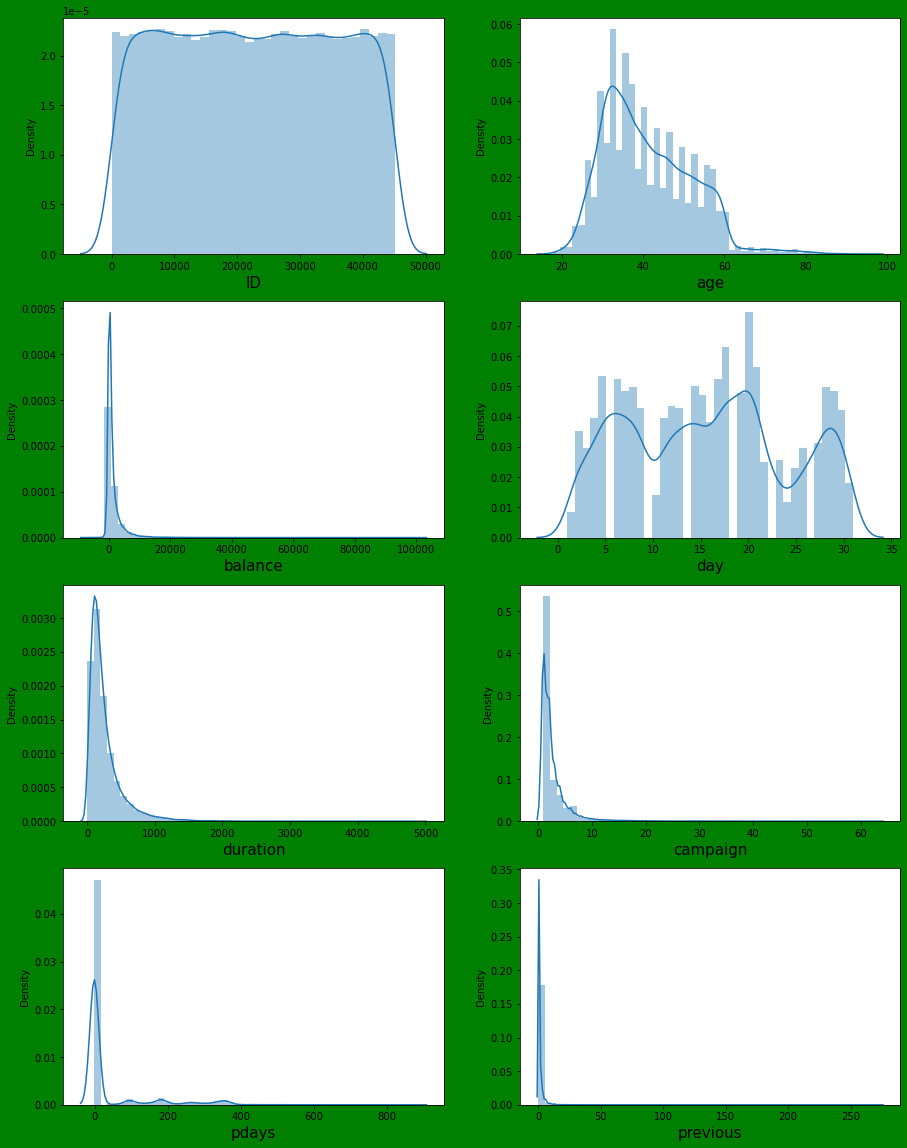

In [25]:
# Checking the Distribution of the Continous columns in Training set.
plt.figure(figsize=(15,20),facecolor='green')
plotnumber=1
for columns in df_train_con:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        ax=sns.distplot(df_train_con[columns])
        plt.xlabel(columns,fontsize=15)
    plotnumber+=1
plt.show()

In [26]:
#Observations:
# we can see skewness in Balance,Pdays,campaign,duration,previous.
# we will visualize using Boxplot.


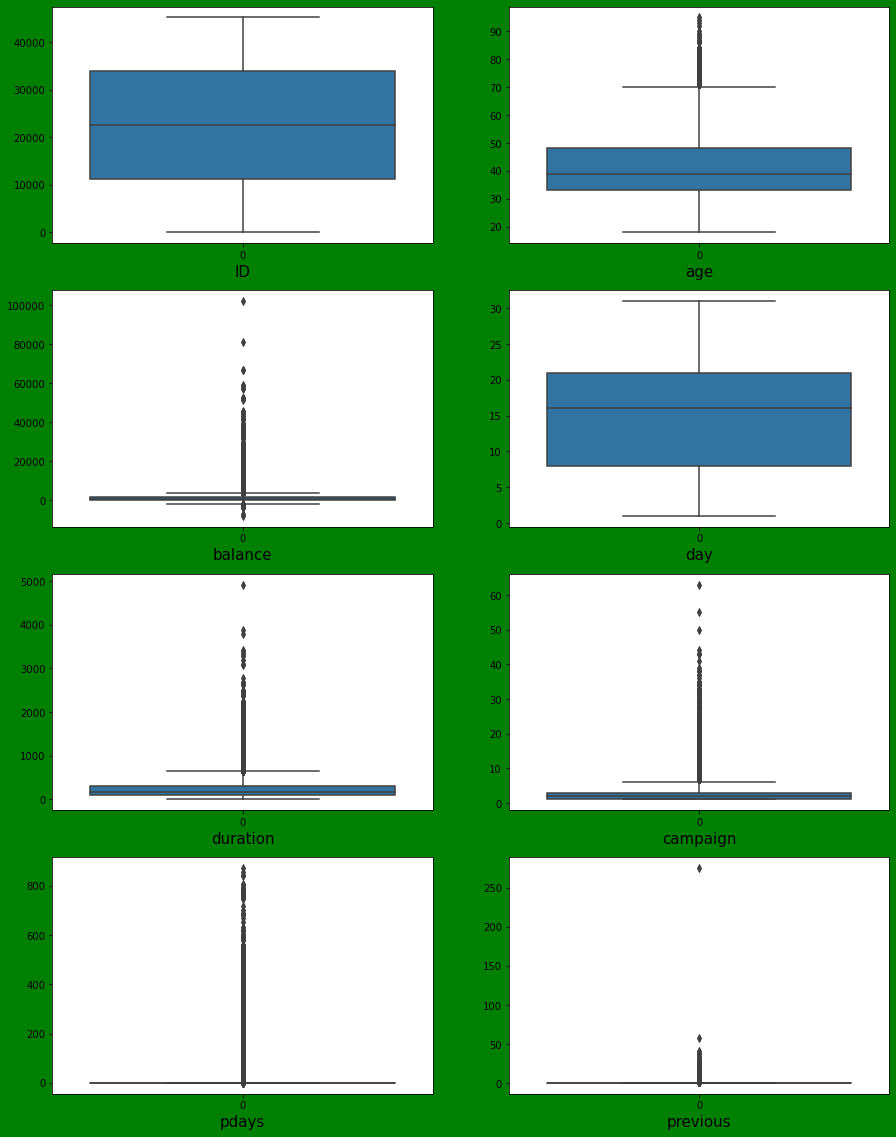

In [27]:
# Checking the outliers in the columns using boxplot.
plt.figure(figsize=(15,20),facecolor='green')
graph=1
for columns in df_train_con:
    if graph<=8:
        plt.subplot(4,2,graph)
        ax=sns.boxplot(data=df_train_con[columns])
        plt.xlabel(columns,fontsize=15)
    graph+=1
plt.show()

In [28]:
 # Using Zscore method to remove the outliers.
from scipy.stats import zscore

In [29]:
z_score=zscore(df_train[['ID', 'age','balance','day','duration','campaign','pdays','previous']])


In [30]:
abs_z_score=np.abs(z_score)
abs_z_score

,ID,age,balance,day,duration,campaign,pdays,previous
0,0.271192,1.415793,0.187933,0.379579,0.832754,0.245906,0.408555,0.237059
1,1.377516,0.937156,0.449397,0.499526,0.649957,0.245906,0.408555,0.237059
2,0.554001,1.313627,0.156159,0.259631,0.070449,0.567059,0.408555,0.237059
3,1.636469,1.509911,0.635055,0.739422,2.368149,0.567059,0.447299,1.001336
4,0.556606,0.937156,0.411091,1.419637,0.474054,0.567059,0.408555,0.237059
...,...,...,...,...,...,...,...,...
31642,1.064493,1.125392,0.450388,0.460055,0.552724,0.245906,0.408555,0.237059
31643,1.347078,1.133439,0.324903,1.299690,0.699635,0.245906,0.408555,0.237059
31644,0.218265,0.843038,0.347358,1.059794,0.859979,0.075247,0.408555,0.237059
31645,1.223031,1.509911,0.376088,0.100212,0.918319,1.359859,2.994723,4.716521


In [31]:
df_new_train=df_train[(abs_z_score<3).all(axis=1)]
df_new_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes


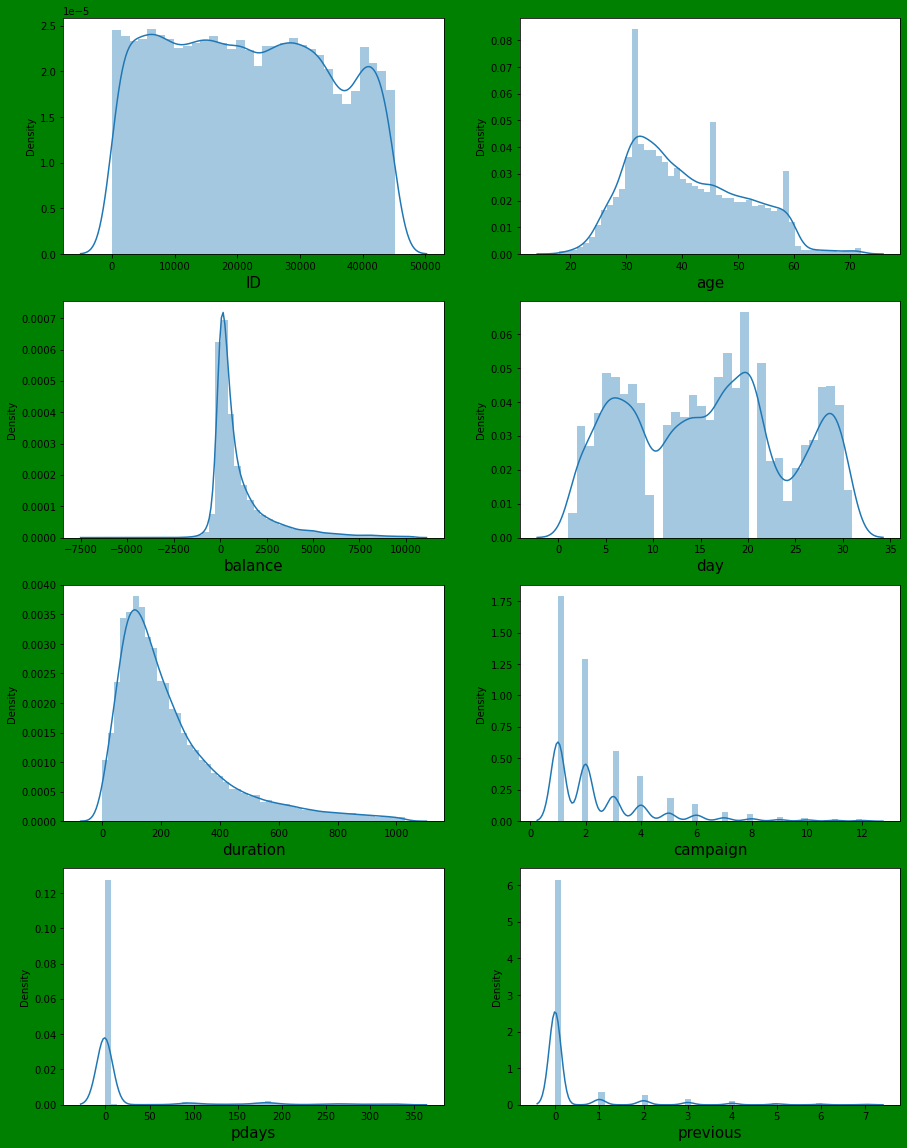

In [32]:
# Checking the distribution after zscore
plt.figure(figsize=(15,20),facecolor='green')
plotnumber=1
for columns in df_new_train[['ID', 'age','balance','day','duration','campaign','pdays','previous']]:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        ax=sns.distplot(df_new_train[columns])
        plt.xlabel(columns,fontsize=15)
    plotnumber+=1
plt.show()

In [33]:
# observations:
# we can see the skewness is removed. and the distribution is better .

In [34]:
# Visualization of categorigal columns.
df_train_cat.columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


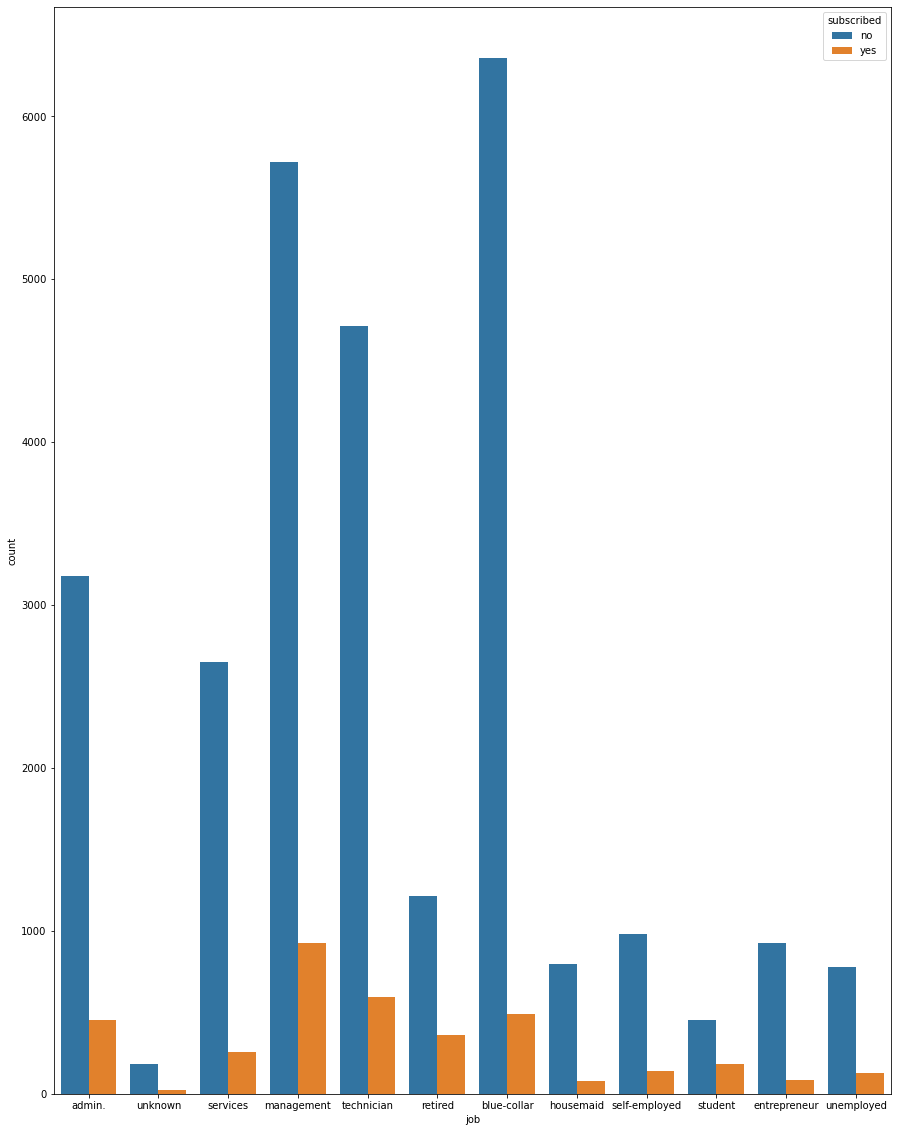

In [35]:
y=df_train_cat['subscribed']
print(df_train_cat['job'].value_counts())#observations: #Management people have subscribed more when compared to other professions.)
plt.figure(figsize=(15,20))
sns.countplot(df_train_cat['job'],hue=y)
plt.show()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


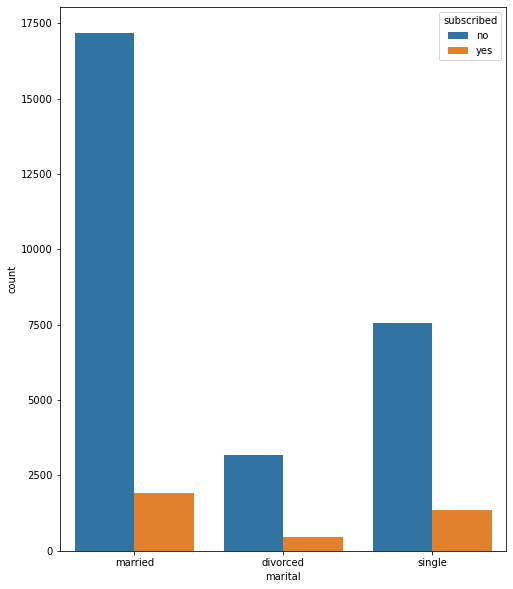

In [36]:
print(df_train_cat['marital'].value_counts())   # Non subscribed people are more in Married Category.
plt.figure(figsize=(8,10))                      # Non Subscribed people are medium in Single Category.
sns.countplot(df_train_cat['marital'],hue=y)    # Non Subscribed people are less in divorced category. 
plt.show()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


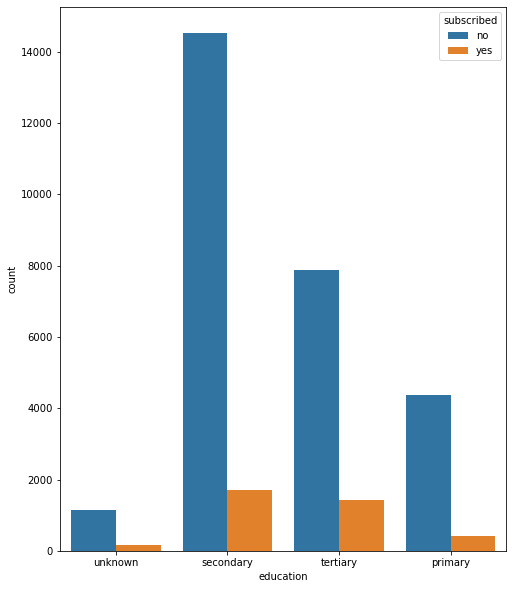

In [37]:
print(df_train_cat['education'].value_counts())
plt.figure(figsize=(8,10))
sns.countplot(df_train_cat['education'],hue=y)
plt.show()
 

yes    17584
no     14063
Name: housing, dtype: int64


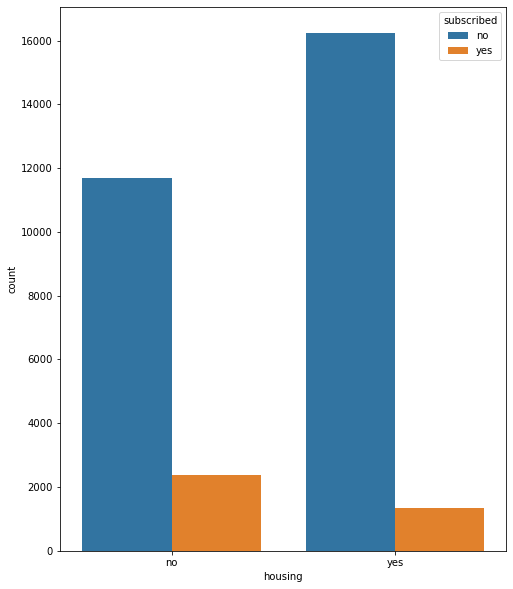

In [38]:
print(df_train_cat['housing'].value_counts())
plt.figure(figsize=(8,10))
sns.countplot(df_train_cat['housing'],hue=y)
plt.show()
# Observations:
# people with No housing loan have subscribed more.

no     26516
yes     5131
Name: loan, dtype: int64


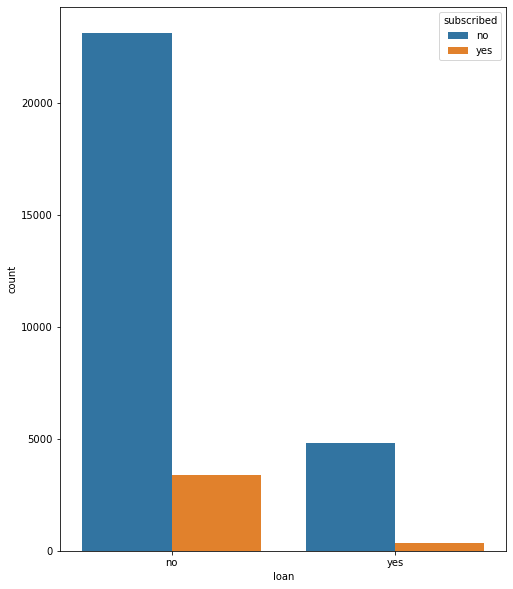

In [39]:
print(df_train_cat['loan'].value_counts())
plt.figure(figsize=(8,10))
sns.countplot(df_train_cat['loan'],hue=y)
plt.show()
#People with No Loan subscribed more comparing to the people with loan.

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


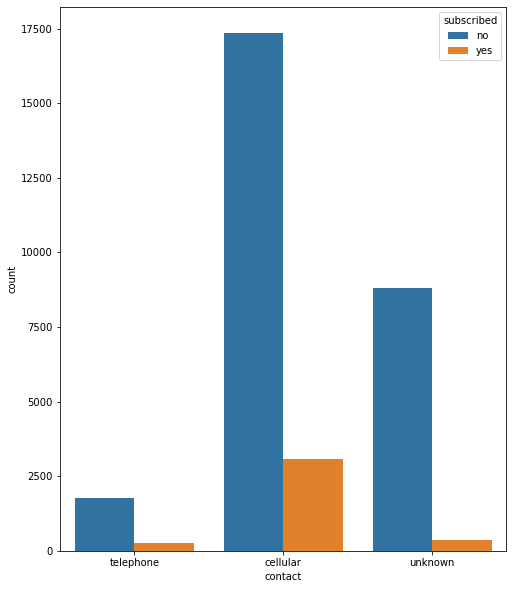

In [40]:
print(df_train_cat['contact'].value_counts())
plt.figure(figsize=(8,10))
sns.countplot(df_train_cat['contact'],hue=y)
plt.show()
# people who have contacted with cellular mode have subscribed more comparing to others.

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


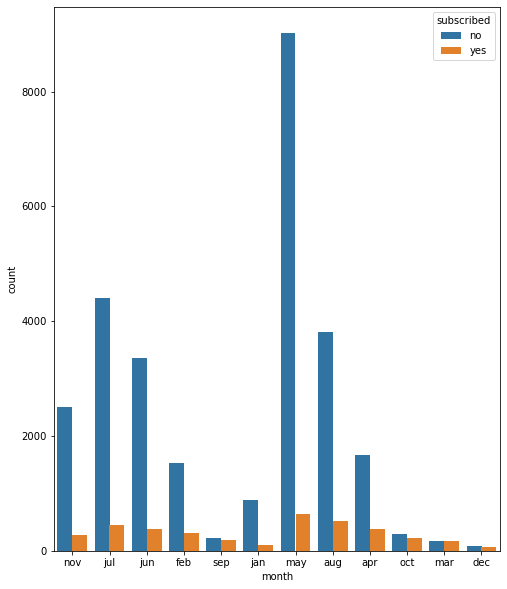

In [41]:
print(df_train_cat['month'].value_counts())
plt.figure(figsize=(8,10))
sns.countplot(df_train_cat['month'],hue=y)
plt.show()
#More people have been contacted in the month of May so the subscription is also high.

In [42]:
df_train_cat.columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

                                           ENCODING CATEGORICAL COLUMNS.

In [43]:
df_train_cat.dtypes

job           object
marital       object
education     object
default       object
housing       object
loan          object
contact       object
month         object
poutcome      object
subscribed    object
dtype: object

In [44]:
from sklearn.preprocessing import OrdinalEncoder

In [45]:
oe=OrdinalEncoder()


In [46]:
for i in df_train_cat.columns:
    if df_train_cat[i].dtype=='object':
        df_train_cat[i]=oe.fit_transform(df_train_cat[i].values.reshape(-1,1))

In [47]:
df_train_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,9.0,3.0,0.0
1,11.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0
2,7.0,1.0,1.0,0.0,1.0,0.0,0.0,5.0,3.0,0.0
3,4.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0
4,9.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
31642,4.0,2.0,2.0,0.0,1.0,0.0,0.0,8.0,3.0,0.0
31643,4.0,0.0,2.0,0.0,0.0,1.0,0.0,6.0,3.0,1.0
31644,4.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
31645,9.0,1.0,1.0,0.0,1.0,0.0,1.0,8.0,0.0,0.0


In [48]:
df_new_train.reset_index()

,index,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no
28120,31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no
28121,31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
28122,31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes


In [49]:
df_new_train.drop(['ID','job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],axis=1,inplace=True) # dropping the ID and Categorical columns from new train data

In [50]:
df_new_train

,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,44,2,-1,0
1,31,3,20,91,2,-1,0
2,27,891,18,240,1,-1,0
3,57,3287,22,867,1,84,3
4,31,119,4,380,1,-1,0
...,...,...,...,...,...,...,...
31640,43,2968,20,30,4,-1,0
31641,37,1309,6,442,2,-1,0
31642,29,0,12,116,2,-1,0
31643,53,380,5,438,2,-1,0


In [51]:
df_new_train=df_new_train.join(df_train_cat)
df_new_train

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,56,1933,19,44,2,-1,0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,9.0,3.0,0.0
1,31,3,20,91,2,-1,0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0
2,27,891,18,240,1,-1,0,7.0,1.0,1.0,0.0,1.0,0.0,0.0,5.0,3.0,0.0
3,57,3287,22,867,1,84,3,4.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0
4,31,119,4,380,1,-1,0,9.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,2968,20,30,4,-1,0,4.0,2.0,1.0,0.0,0.0,0.0,2.0,6.0,3.0,0.0
31641,37,1309,6,442,2,-1,0,9.0,2.0,2.0,0.0,0.0,0.0,2.0,6.0,3.0,0.0
31642,29,0,12,116,2,-1,0,4.0,2.0,2.0,0.0,1.0,0.0,0.0,8.0,3.0,0.0
31643,53,380,5,438,2,-1,0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,6.0,3.0,1.0


In [52]:
df_new_train['subscribed'].value_counts() # Checking The Target Variable count,classes are imbalance.will balance it shortly.

0.0    25264
1.0     2860
Name: subscribed, dtype: int64

In [53]:
df_new_train.shape

(28124, 17)

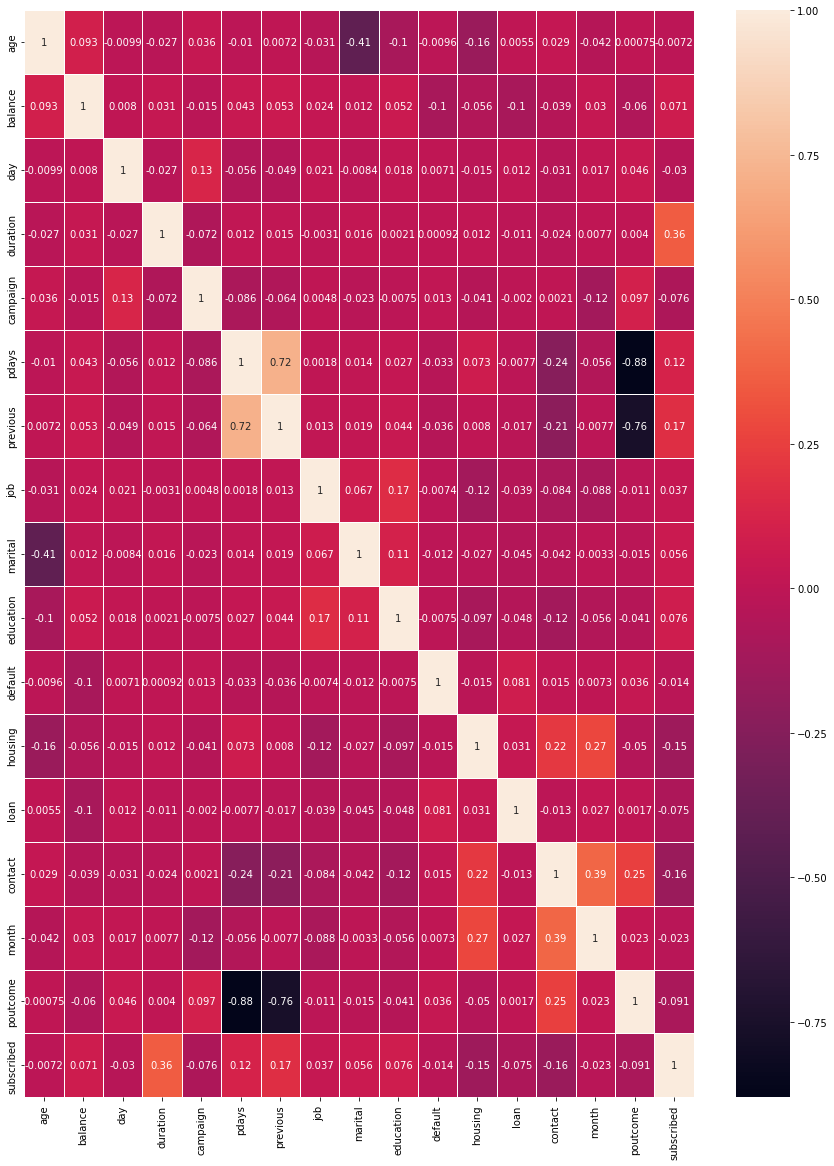

In [54]:
# we will see the Correlation now between the columns.

corr=df_new_train.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr,annot=True,linewidths=0.5)
plt.show()

In [55]:
corr['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.355888
previous      0.174095
pdays         0.116641
education     0.075838
balance       0.070595
marital       0.056387
job           0.036743
age          -0.007172
default      -0.014500
month        -0.022564
day          -0.030122
loan         -0.074803
campaign     -0.075836
poutcome     -0.091071
housing      -0.145640
contact      -0.158031
Name: subscribed, dtype: float64

In [56]:
# Observations:
#Duration is having strong bond with Target Variable.
# Multicollinearity is there between 'pdays and previous columns.'


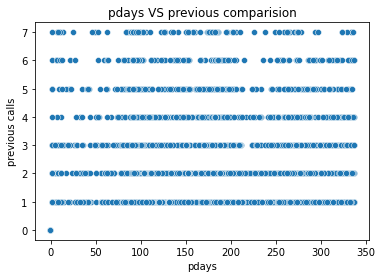

In [57]:
plt.figure()
sns.scatterplot(x=df_new_train['pdays'],y=df_new_train['previous'])
plt.xlabel('pdays')
plt.ylabel('previous calls')
plt.title('pdays VS previous comparision')
plt.show()

In [58]:
# Observations:
# Didnt see much relation,checking towards the contribution of target variable.
# decided to drop 'pdays column from training Dataset.'
# Decided to drop default column as well

In [59]:
df_new_train.drop(columns=['default','pdays'],axis=1,inplace=True)

In [60]:
df_new_train

,age,balance,day,duration,campaign,previous,job,marital,education,housing,loan,contact,month,poutcome,subscribed
0,56,1933,19,44,2,0,0.0,1.0,3.0,0.0,0.0,1.0,9.0,3.0,0.0
1,31,3,20,91,2,0,11.0,1.0,1.0,0.0,0.0,0.0,5.0,3.0,0.0
2,27,891,18,240,1,0,7.0,1.0,1.0,1.0,0.0,0.0,5.0,3.0,0.0
3,57,3287,22,867,1,3,4.0,0.0,2.0,0.0,0.0,0.0,6.0,2.0,1.0
4,31,119,4,380,1,0,9.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,2968,20,30,4,0,4.0,2.0,1.0,0.0,0.0,2.0,6.0,3.0,0.0
31641,37,1309,6,442,2,0,9.0,2.0,2.0,0.0,0.0,2.0,6.0,3.0,0.0
31642,29,0,12,116,2,0,4.0,2.0,2.0,1.0,0.0,0.0,8.0,3.0,0.0
31643,53,380,5,438,2,0,4.0,0.0,2.0,0.0,1.0,0.0,6.0,3.0,1.0


In [61]:
y=df_new_train['subscribed']
y
y.shape


(28124,)

In [62]:
x=df_new_train.drop('subscribed',axis=1)
x
x.shape

(28124, 14)

In [63]:
x

,age,balance,day,duration,campaign,previous,job,marital,education,housing,loan,contact,month,poutcome
0,56,1933,19,44,2,0,0.0,1.0,3.0,0.0,0.0,1.0,9.0,3.0
1,31,3,20,91,2,0,11.0,1.0,1.0,0.0,0.0,0.0,5.0,3.0
2,27,891,18,240,1,0,7.0,1.0,1.0,1.0,0.0,0.0,5.0,3.0
3,57,3287,22,867,1,3,4.0,0.0,2.0,0.0,0.0,0.0,6.0,2.0
4,31,119,4,380,1,0,9.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,2968,20,30,4,0,4.0,2.0,1.0,0.0,0.0,2.0,6.0,3.0
31641,37,1309,6,442,2,0,9.0,2.0,2.0,0.0,0.0,2.0,6.0,3.0
31642,29,0,12,116,2,0,4.0,2.0,2.0,1.0,0.0,0.0,8.0,3.0
31643,53,380,5,438,2,0,4.0,0.0,2.0,0.0,1.0,0.0,6.0,3.0


In [64]:
x.skew()

age          0.438496
balance      2.437605
day          0.073752
duration     1.596552
campaign     2.059359
previous     3.691573
job          0.260890
marital     -0.097176
education    0.199721
housing     -0.203589
loan         1.787691
contact      0.694487
month       -0.471673
poutcome    -2.473077
dtype: float64

Remove skewness with PowerTransform

In [65]:
from sklearn.preprocessing import power_transform

In [66]:
X=power_transform(x)
X

array([[ 1.41866653,  0.57598031,  0.43489739, ...,  0.98836908,
         1.21138935,  0.40179   ],
       [-0.9703379 , -0.56564773,  0.5432341 , ..., -0.75538924,
        -0.20797178,  0.40179   ],
       [-1.52305603,  0.01156179,  0.32490763, ..., -0.75538924,
        -0.20797178,  0.40179   ],
       ...,
       [-1.23747121, -0.56924349, -0.37736943, ..., -0.75538924,
         0.84708883,  0.40179   ],
       [ 1.19497366, -0.29428361, -1.34351952, ..., -0.75538924,
         0.13670228,  0.40179   ],
       [-0.8429746 , -0.3380082 , -1.04316112, ..., -0.75538924,
        -1.48546811,  0.40179   ]])

                                        smote for Target Variable.

In [67]:
y.value_counts()           # Classes are imbalanced

0.0    25264
1.0     2860
Name: subscribed, dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [70]:
y.value_counts()              #Checking after resampling.

0.0    25264
1.0    25264
Name: subscribed, dtype: int64

                                       Train_test_split                             

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
from sklearn.linear_model import LogisticRegression


In [73]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [74]:
lr=LogisticRegression()
# to Choose Best Random state.


In [75]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=56)
lr.fit(x_train,y_train)
    
    

LogisticRegression()

In [76]:
pred_test=lr.predict(x_test)
accuracy_score(y_test,pred_test)

0.8237017099430018

                                  CROSS_VAL_SCORE

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
for j in range(2,10):
    lss_score=cross_val_score(lr,X,y,cv=j)
    print(lss_score)
    lsc_score=lss_score.mean()
    print("At CV Fold,:",j)
    print("Cross Valid Score is:",lsc_score*100)
    print("Accuracy Score is :",accuracy_score(y_test,pred_test)*100)

[0.81424161 0.82275174]
At CV Fold,: 2
Cross Valid Score is: 81.84966751108297
Accuracy Score is : 82.37017099430018
[0.81179125 0.82051891 0.8240114 ]
At CV Fold,: 3
Cross Valid Score is: 81.87738528646929
Accuracy Score is : 82.37017099430018
[0.80961051 0.8191102  0.82528499 0.82124763]
At CV Fold,: 4
Cross Valid Score is: 81.88133312222926
Accuracy Score is : 82.37017099430018
[0.80783693 0.81733624 0.82010687 0.82958931 0.81880257]
At CV Fold,: 5
Cross Valid Score is: 81.87343833739403
Accuracy Score is : 82.37017099430018
[0.8075279  0.81619568 0.81961762 0.82211139 0.82650517 0.82211139]
At CV Fold,: 6
Cross Valid Score is: 81.90115242928177
Accuracy Score is : 82.37017099430018
[0.80440504 0.81701067 0.81961762 0.81975617 0.82640621 0.82599058
 0.82031034]
At CV Fold,: 7
Cross Valid Score is: 81.90709453408432
Accuracy Score is : 82.37017099430018
[0.8030399  0.81649778 0.82013933 0.81808106 0.82203927 0.82963901
 0.82156428 0.82156428]
At CV Fold,: 8
Cross Valid Score is: 81.9

In [79]:
# Choosing cv=2,where the difference with model accuracy is less.

                               Building the Dataset with otherModels.

In [80]:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=56)
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    cvs=cross_val_score(algorithm,X,y,cv=5)
    cvc=cvs.mean()
    print("The Accuracy score of the Model Training Data:",accuracy_score(y_train,pred_algo_train)*100)
    print("The Accuracy score of the Model Test Data:",accuracy_score(y_test,pred_algo_test)*100)
    print("The Cross Valid Score of the Algorithm:",cvc*100)
    print("The Classification report of the Model is :",classification_report(y_test,pred_algo_test))
    print("The Confusion Matrix is :",confusion_matrix(y_test,pred_algo_test))
    print("The Difference between Cross Val score and Accuracy score is: ",(cvc*100-accuracy_score(y_test,pred_algo_test)*100))

In [81]:
# Training the Model with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt=DecisionTreeClassifier()

In [83]:
model_selection(dt,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 100.0
The Accuracy score of the Model Test Data: 91.45028499050032
The Cross Valid Score of the Algorithm: 91.12776836684043
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.92      0.91      0.91      6385
         1.0       0.91      0.92      0.91      6247

    accuracy                           0.91     12632
   macro avg       0.91      0.91      0.91     12632
weighted avg       0.91      0.91      0.91     12632

The Confusion Matrix is : [[5788  597]
 [ 483 5764]]
The Difference between Cross Val score and Accuracy score is:  -0.32251662365989375


In [84]:
# Training the Model with Kneighbors classifier 
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn=KNeighborsClassifier()

In [86]:
model_selection(knn,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 93.55868693265779
The Accuracy score of the Model Test Data: 90.92780240658644
The Cross Valid Score of the Algorithm: 91.32956656472564
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       1.00      0.82      0.90      6385
         1.0       0.85      1.00      0.92      6247

    accuracy                           0.91     12632
   macro avg       0.92      0.91      0.91     12632
weighted avg       0.92      0.91      0.91     12632

The Confusion Matrix is : [[5265 1120]
 [  26 6221]]
The Difference between Cross Val score and Accuracy score is:  0.4017641581392013


In [87]:
# training the Model with Ensemble Techniques.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [88]:
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
gbt=GradientBoostingClassifier()
xgb=XGBClassifier()

In [89]:
model_selection(rf,x_train,x_test,y_train,y_test)
model_selection(ada,x_train,x_test,y_train,y_test)
model_selection(gbt,x_train,x_test,y_train,y_test)
model_selection(xgb,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 100.0
The Accuracy score of the Model Test Data: 94.9889170360988
The Cross Valid Score of the Algorithm: 95.10968866090691
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      6385
         1.0       0.93      0.97      0.95      6247

    accuracy                           0.95     12632
   macro avg       0.95      0.95      0.95     12632
weighted avg       0.95      0.95      0.95     12632

The Confusion Matrix is : [[5947  438]
 [ 195 6052]]
The Difference between Cross Val score and Accuracy score is:  0.1207716248081141
The Accuracy score of the Model Training Data: 88.6663500105552
The Accuracy score of the Model Test Data: 88.59246358454718
The Cross Valid Score of the Algorithm: 88.18086815138064
The Classification report of the Model is :               precision    recall  f1-score   support

         0.0       0.89      0.88      0.

ROC_AOC_CURVE

In [90]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.metrics import plot_roc_curve

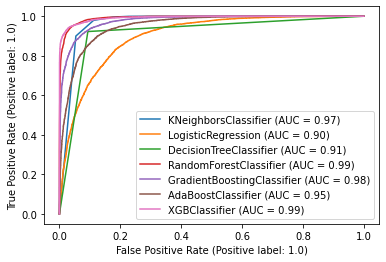

In [91]:
disp=plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [ ]:
#selecting XGBClassifier as final model.

In [99]:
import joblib
joblib.dump(xgb,'Bank_Subscribtion.pkl')

['Bank_Subscribtion.pkl']

In [102]:
loaded_model=joblib.load(open('Bank_Subscribtion.pkl','rb'))
loaded_model.predict(x_test)

array([0, 0, 1, ..., 1, 1, 1])

In [103]:
actual=np.array(y_test)
predicted=loaded_model.predict(x_test)
conclusion=pd.DataFrame({'Actual':actual,'predicted':predicted})
conclusion

,Actual,predicted
0,0.0,0
1,0.0,0
2,1.0,1
3,0.0,0
4,1.0,1
...,...,...
12627,1.0,1
12628,1.0,1
12629,1.0,1
12630,1.0,1


Now we have Build the Model with Training Dataset,will test the same with our Test data set,Before testing ,removed the columns
and encoded the categorical data to check the same.

In [155]:
df_test_cat.columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [135]:
from sklearn.preprocessing import OrdinalEncoder

In [136]:
oe=OrdinalEncoder()

In [137]:
for i in df_test_cat.columns:
    if df_test_cat[i].dtype=='object':
        df_test_cat[i]=oe.fit_transform(df_test_cat[i].values.reshape(-1,1))

In [138]:
df_test_cat

,job,marital,education,default,housing,loan,contact,month,poutcome
0,7.0,1.0,1.0,0.0,1.0,0.0,0.0,8.0,3.0
1,5.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0
2,6.0,2.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0
3,7.0,2.0,0.0,0.0,1.0,0.0,1.0,8.0,3.0
4,1.0,0.0,1.0,0.0,0.0,1.0,2.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...
13559,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0
13560,1.0,1.0,0.0,0.0,1.0,0.0,2.0,6.0,3.0
13561,5.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,3.0
13562,0.0,2.0,1.0,0.0,0.0,0.0,0.0,9.0,2.0


In [140]:
df_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [141]:
df_test=df_test.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'])

In [142]:
df_test

,ID,age,balance,day,duration,campaign,pdays,previous
0,38441,32,118,15,20,6,-1,0
1,40403,78,2787,1,372,1,-1,0
2,3709,31,144,16,676,1,-1,0
3,37422,57,3777,13,65,2,-1,0
4,12527,45,-705,3,111,1,-1,0
...,...,...,...,...,...,...,...,...
13559,23465,39,45,28,148,4,-1,0
13560,11743,54,2281,20,158,1,-1,0
13561,28292,35,285,29,136,1,-1,0
13562,45163,29,464,9,208,2,91,3


In [143]:
df_test=df_test.join(df_test_cat)
df_test

,ID,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,38441,32,118,15,20,6,-1,0,7.0,1.0,1.0,0.0,1.0,0.0,0.0,8.0,3.0
1,40403,78,2787,1,372,1,-1,0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0
2,3709,31,144,16,676,1,-1,0,6.0,2.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0
3,37422,57,3777,13,65,2,-1,0,7.0,2.0,0.0,0.0,1.0,0.0,1.0,8.0,3.0
4,12527,45,-705,3,111,1,-1,0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,45,28,148,4,-1,0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0
13560,11743,54,2281,20,158,1,-1,0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,6.0,3.0
13561,28292,35,285,29,136,1,-1,0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,3.0
13562,45163,29,464,9,208,2,91,3,0.0,2.0,1.0,0.0,0.0,0.0,0.0,9.0,2.0


In [144]:
df_test.shape

(13564, 17)

In [145]:
df_test=df_test.drop(columns=['ID','pdays','default']) # Removing the Features which is deleted in the training Model,so that
df_test                                                # when we predict we can get same accuracy.

,age,balance,day,duration,campaign,previous,job,marital,education,housing,loan,contact,month,poutcome
0,32,118,15,20,6,0,7.0,1.0,1.0,1.0,0.0,0.0,8.0,3.0
1,78,2787,1,372,1,0,5.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0
2,31,144,16,676,1,0,6.0,2.0,2.0,1.0,0.0,2.0,8.0,3.0
3,57,3777,13,65,2,0,7.0,2.0,0.0,1.0,0.0,1.0,8.0,3.0
4,45,-705,3,111,1,0,1.0,0.0,1.0,0.0,1.0,2.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,45,28,148,4,0,4.0,1.0,2.0,0.0,0.0,0.0,1.0,3.0
13560,54,2281,20,158,1,0,1.0,1.0,0.0,1.0,0.0,2.0,6.0,3.0
13561,35,285,29,136,1,0,5.0,1.0,0.0,1.0,0.0,0.0,4.0,3.0
13562,29,464,9,208,2,3,0.0,2.0,1.0,0.0,0.0,0.0,9.0,2.0


In [147]:
load_model=joblib.load(open('Bank_Subscribtion.pkl','rb')) # Loaded the training saved best Model.
predict=load_model.predict(df_test)                        # doing Prediction for test data.

In [148]:
predict

array([1, 1, 1, ..., 1, 1, 1])

In [154]:
df_test['predict']=predict
# Added a column of predicted along with the original Test Data ,as predicted by the model.
df_test

,age,balance,day,duration,campaign,previous,job,marital,education,housing,loan,contact,month,poutcome,predict
0,32,118,15,20,6,0,7.0,1.0,1.0,1.0,0.0,0.0,8.0,3.0,1
1,78,2787,1,372,1,0,5.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,1
2,31,144,16,676,1,0,6.0,2.0,2.0,1.0,0.0,2.0,8.0,3.0,1
3,57,3777,13,65,2,0,7.0,2.0,0.0,1.0,0.0,1.0,8.0,3.0,1
4,45,-705,3,111,1,0,1.0,0.0,1.0,0.0,1.0,2.0,5.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,45,28,148,4,0,4.0,1.0,2.0,0.0,0.0,0.0,1.0,3.0,1
13560,54,2281,20,158,1,0,1.0,1.0,0.0,1.0,0.0,2.0,6.0,3.0,1
13561,35,285,29,136,1,0,5.0,1.0,0.0,1.0,0.0,0.0,4.0,3.0,1
13562,29,464,9,208,2,3,0.0,2.0,1.0,0.0,0.0,0.0,9.0,2.0,1


In [153]:
df_test['predict'].value_counts() # Just showed the count of predicted(test Dataset) for your reference.

1    12161
0     1403
Name: predict, dtype: int64